In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
import seaborn as sn
np.random.seed(2)
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv(r'E:\Machine Learning\Credit card Fraud\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

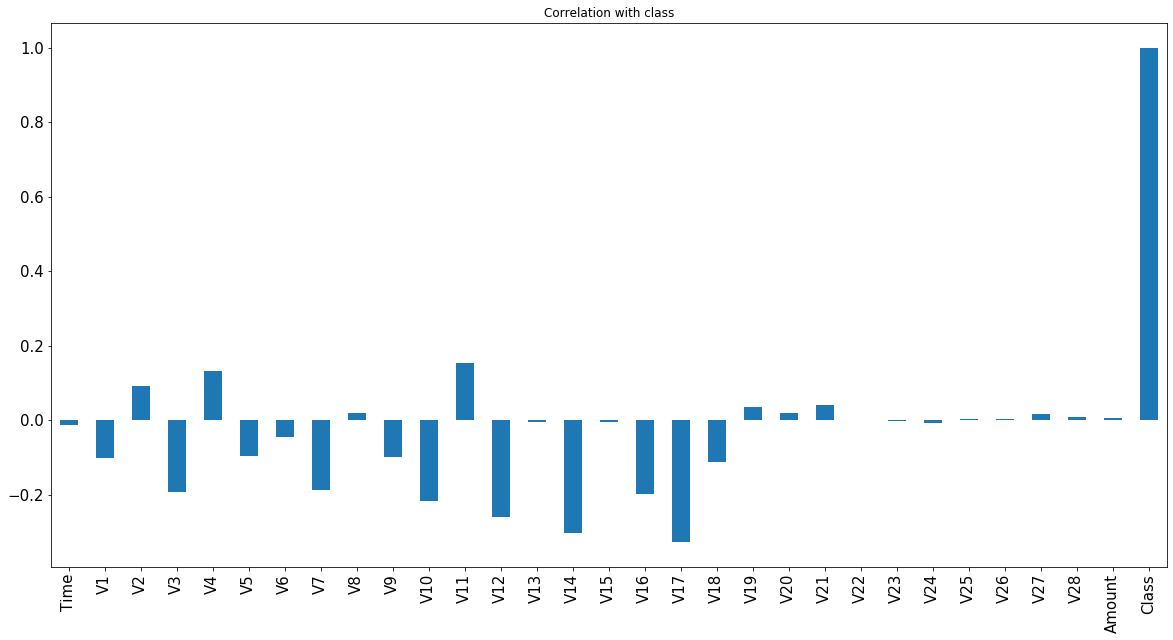

In [5]:
data.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        grid = False)

In [6]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 32, epochs = 100)

W0920 15:25:05.845428  1104 deprecation_wrapper.py:119] From C:\Users\Roh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0920 15:25:06.847962  1104 deprecation_wrapper.py:119] From C:\Users\Roh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0920 15:25:06.968897  1104 deprecation_wrapper.py:119] From C:\Users\Roh\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0920 15:25:07.124868  1104 deprecation_wrapper.py:119] From C:\Users\Roh\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0920 15:25:07.187412  1104 deprecation_wrapper.py:119] From C:\Users\Roh\Anaconda3\lib\

Epoch 1/100
199364/199364 [==============================] - 15s 73us/step - loss: 0.0285 - acc: 0.9981
Epoch 2/100
199364/199364 [==============================] - 11s 57us/step - loss: 0.0279 - acc: 0.9983
Epoch 3/100
199364/199364 [==============================] - 11s 57us/step - loss: 0.0279 - acc: 0.9983
Epoch 4/100
199364/199364 [==============================] - 11s 55us/step - loss: 0.0279 - acc: 0.9983
Epoch 5/100
199364/199364 [==============================] - 12s 60us/step - loss: 0.0279 - acc: 0.9983
Epoch 6/100
199364/199364 [==============================] - 13s 67us/step - loss: 0.0279 - acc: 0.9983
Epoch 7/100
199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 8/100
199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 9/100
199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 10/100
199364/199364 [==============================] - 12

199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 80/100
199364/199364 [==============================] - 13s 65us/step - loss: 0.0279 - acc: 0.9983
Epoch 81/100
199364/199364 [==============================] - 13s 64us/step - loss: 0.0279 - acc: 0.9983
Epoch 82/100
199364/199364 [==============================] - 13s 64us/step - loss: 0.0279 - acc: 0.9983
Epoch 83/100
199364/199364 [==============================] - 13s 63us/step - loss: 0.0279 - acc: 0.9983
Epoch 84/100
199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 85/100
199364/199364 [==============================] - 12s 60us/step - loss: 0.0279 - acc: 0.9983
Epoch 86/100
199364/199364 [==============================] - 12s 61us/step - loss: 0.0279 - acc: 0.9983
Epoch 87/100
199364/199364 [==============================] - 12s 60us/step - loss: 0.0279 - acc: 0.9983
Epoch 88/100
199364/199364 [==============================] - 13s 63

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.1)

In [13]:
score = classifier.evaluate(X_test, y_test)
score

85443/85443 [==============================] - 3s 38us/step


[0.02773039775430765, 0.9982795547909132]

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[85296,     0],
       [  147,     0]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

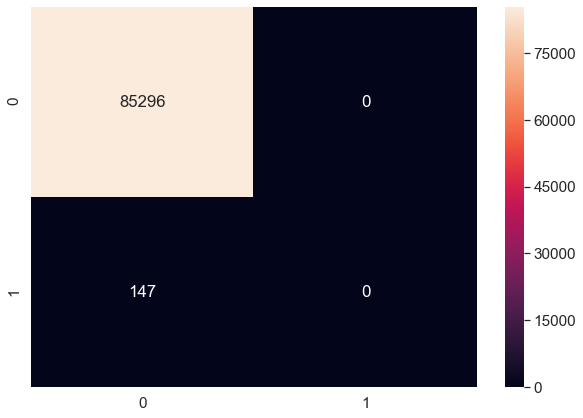

In [17]:
cm = confusion_matrix(y_test, y_pred) 
results = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(results, annot=True, fmt='g')

In [18]:
print(y_test, y_pred)

        Class
183484      0
255448      0
244749      0
63919       0
11475       0
134016      0
204962      0
60121       0
167362      0
112790      0
202391      0
209695      0
68361       0
224208      0
32583       0
134258      0
187243      0
145419      0
245566      0
11553       0
220848      0
239278      0
21330       0
18027       0
197746      0
272672      0
141351      0
264200      0
127575      0
110998      0
...       ...
276568      0
231529      0
89308       0
267373      0
34413       0
247649      0
97729       0
53374       0
46145       0
263180      0
18162       0
24989       0
264151      0
109457      0
7130        0
217940      0
185464      0
35703       0
115340      0
122340      0
184209      0
222795      0
124164      0
80329       0
195998      0
208059      0
260930      0
75125       0
37292       0
240913      0

[85443 rows x 1 columns] [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
